## Importing the necessary library

In [1]:
import numpy as np
import pandas as pd

## Importing the datasets

In [2]:
train_df = pd.read_csv('/Users/neeraanand/mnist_train_small.csv')

In [3]:
test_df  = pd.read_csv('/Users/neeraanand/mnist_test.csv')

In [4]:
train_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Extracting the features

In [6]:
X_train = train_df.drop(['6'], axis=1).values

In [7]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
X_test = test_df.drop(index=1942, columns='7').values

In [9]:
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Extracting the labels

In [10]:
y_train = train_df['6'].values

In [11]:
print(y_train)

[5 7 9 ... 2 9 5]


In [12]:
y_test = test_df['7'].drop(1942).values

In [13]:
print(y_test)

[2 1 0 ... 5 7 8]


## Normalising the train and test data

In [14]:
X_train = X_train/255
X_test = X_test/255

## Visualizing the data

In [15]:
%matplotlib inline

In [16]:
import matplotlib
import matplotlib.pyplot as plt

In [17]:
any_digit = X_train[0]
any_digit_image = any_digit.reshape(28,28)

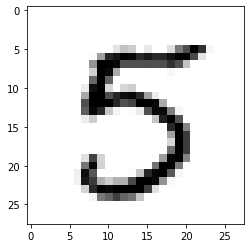

In [18]:
plt.imshow(any_digit_image, cmap = matplotlib.cm.binary, interpolation ='nearest')

## Defining the euclidian distance

In [19]:
def euclidian_distance(p1, p2):
    # p1 = point 1, p2 = point 2
    return np.sqrt(np.sum((p1-p2)**2))

## Creating the KNN class

In [20]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    ## Creating the fit function  
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    ## Creating the predict function    
    def predict(self, X):
        y_pred = np.array([])
        for i in X:
            y_pred = np.append(y_pred, self.pred(i)) 
        return y_pred
    
    ## Here pred is the helper function
    def pred(self, x):
        distances = np.array([])
        ## distances is array to store distances between test example and all examples of train set
        
        for j in self.X_train:
            distances = np.append(distances, euclidian_distance(x, j))
        ## Here we get first k neighbours by sorting the above calculated distances 
        
        k_idx = np.argsort(distances)[:self.k]
        k_near_neighbours = np.array([])
        
        for i in k_idx:
            k_near_neighbours = np.append(k_near_neighbours, self.y_train[i])
            k_near_neighbours = k_near_neighbours.astype(int)
        most_frequent = np.bincount(k_near_neighbours).argmax()
        ## most_frequent gives the most common class label
        return most_frequent

In [21]:
k = 4
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [22]:
print(predictions)

[2. 1. 0. ... 5. 7. 8.]


In [23]:
df = pd.DataFrame(columns = ['Predicted_target', 'Original_target'])
df['Predicted_target'] = predictions
df['Original_target'] = y_test
df.head()

,Predicted_target,Original_target
0,2.0,2
1,1.0,1
2,0.0,0
3,4.0,4
4,1.0,1


## Finding the accuracy

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions, y_test)*100, '%')

93.87229660144182 %
